<a href="https://colab.research.google.com/github/mak4x13/Machine-Learning/blob/main/California_Housing_Prediction_using_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets


In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing = fetch_california_housing()
# to find more about data we could print it, it is in array and contain all the info about data
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['HousePrice'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe()
# df.isna().sum()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


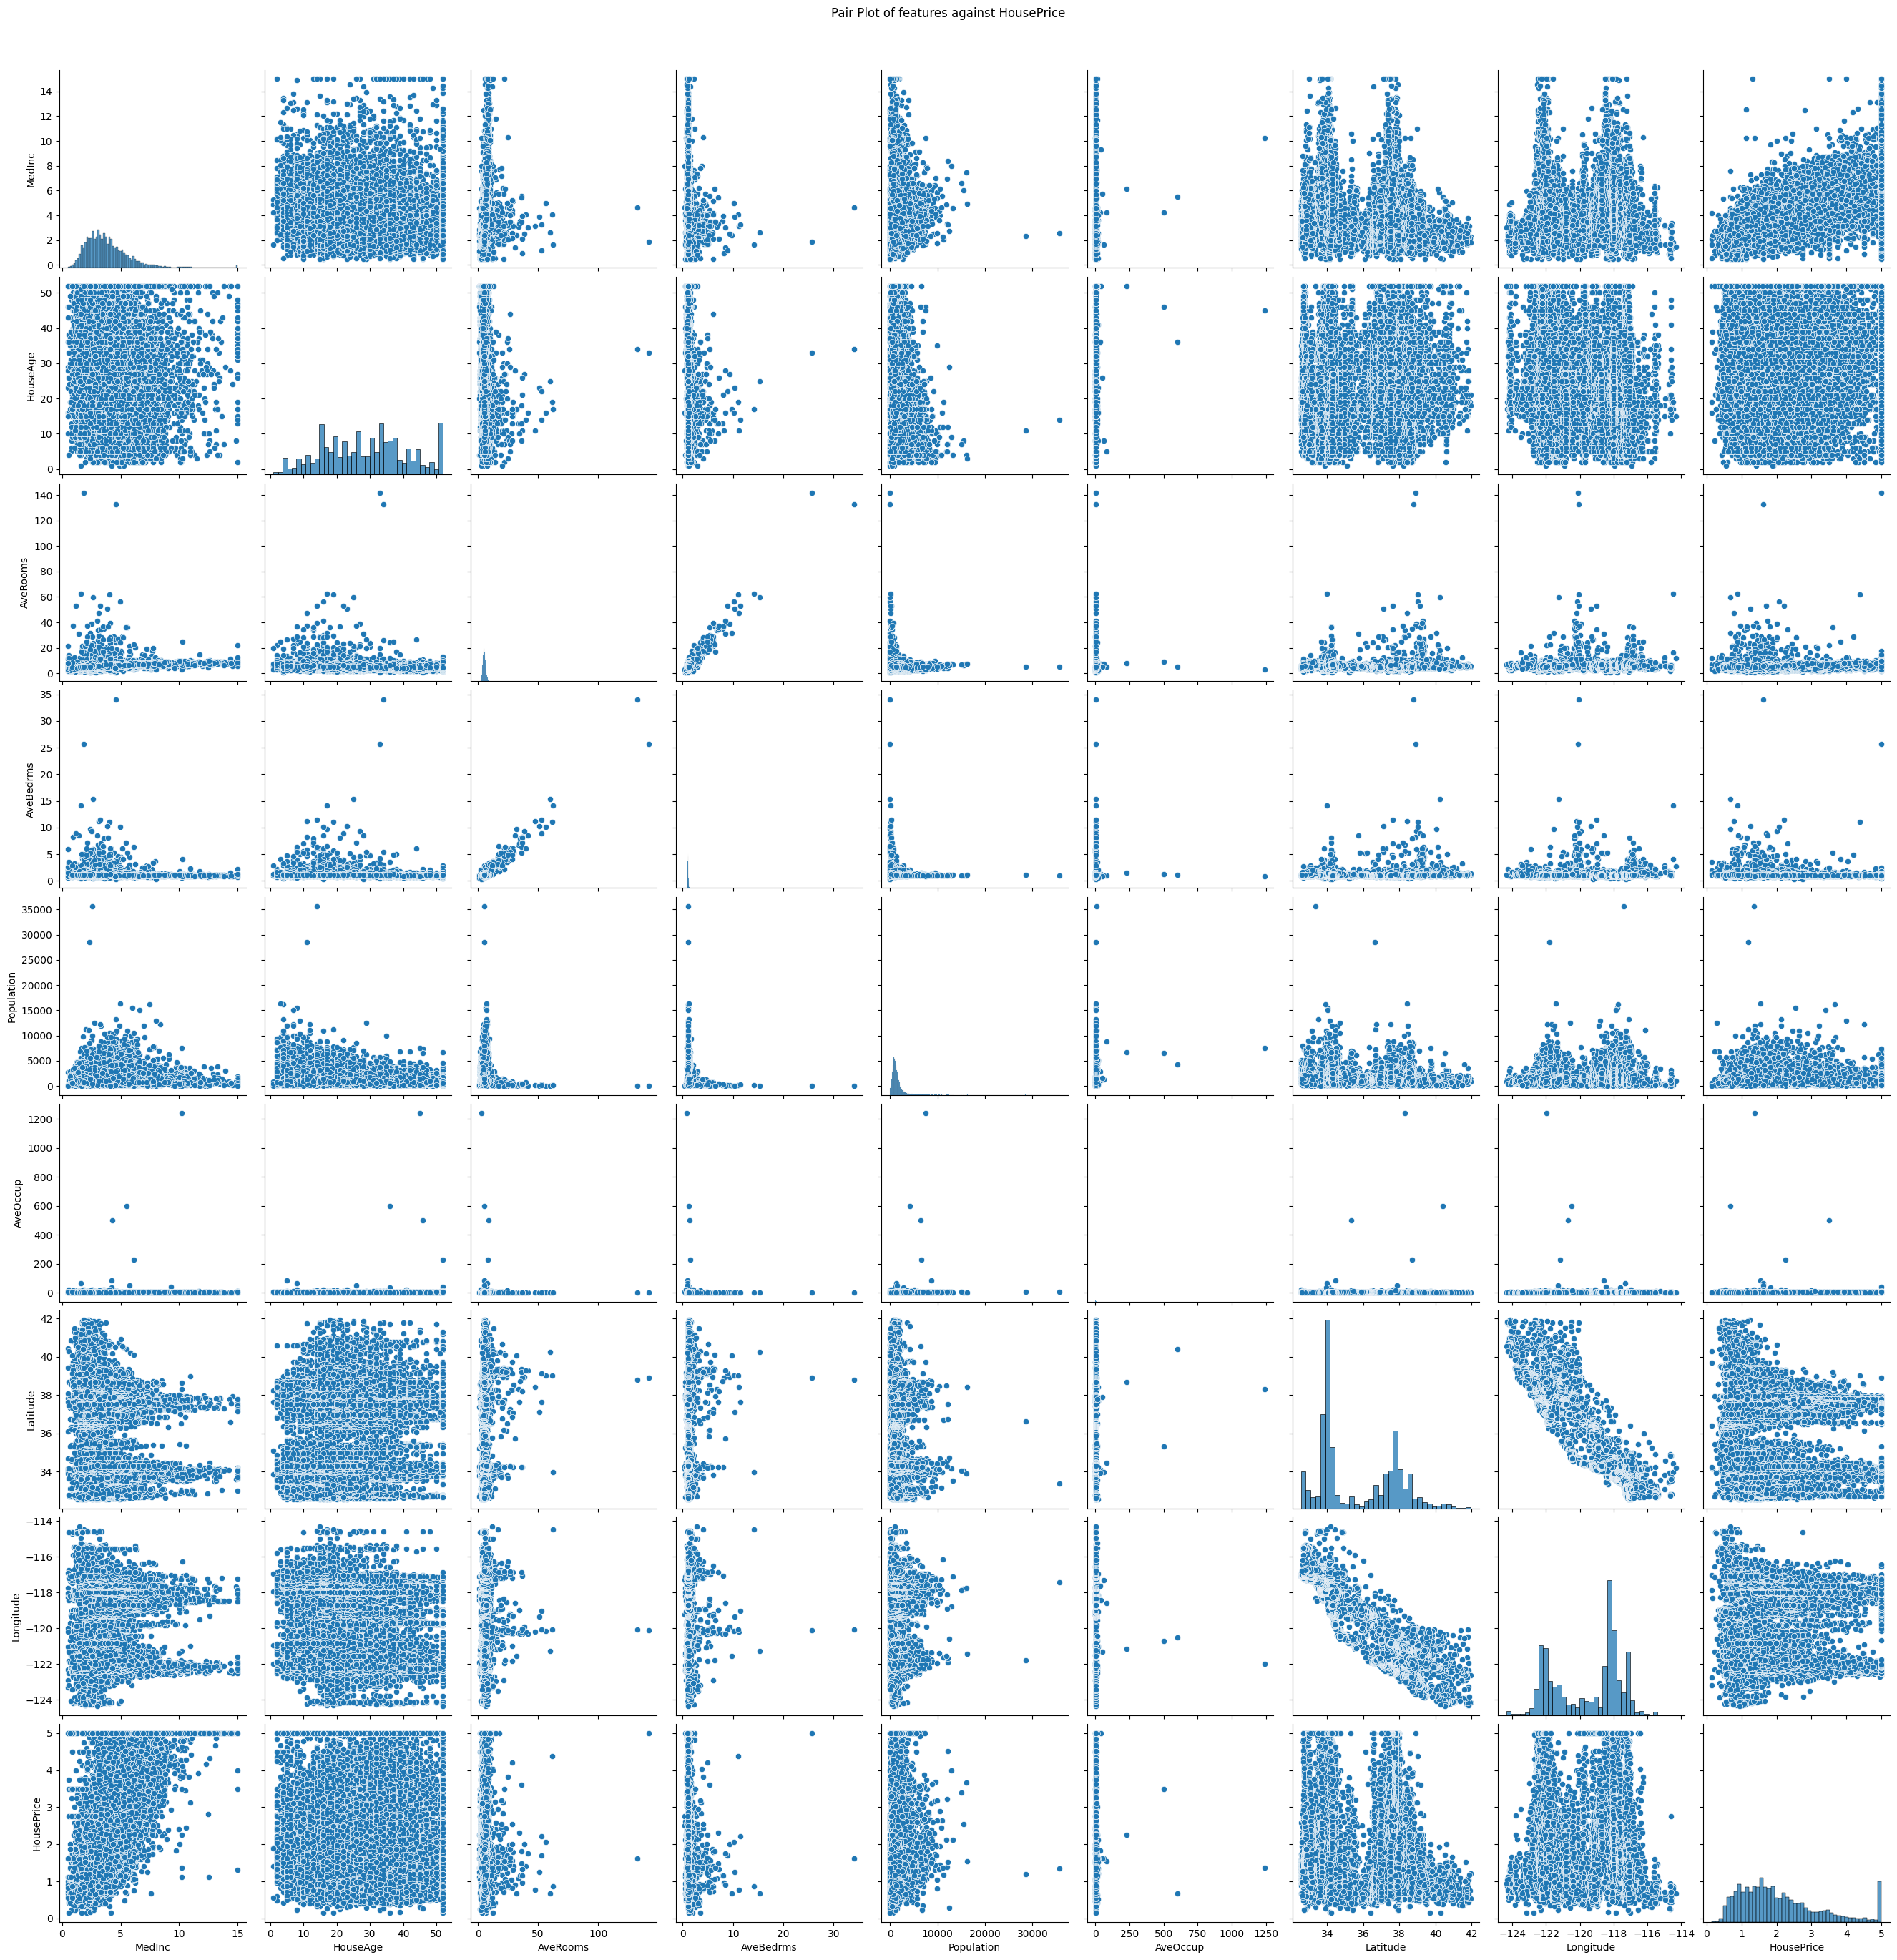

In [ ]:
sns.pairplot(df, height=3)
# height of evry plot
plt.suptitle('Pair Plot of features against HousePrice', y=1.02)
# y shifts the title above the plot for better spacing
plt.show()

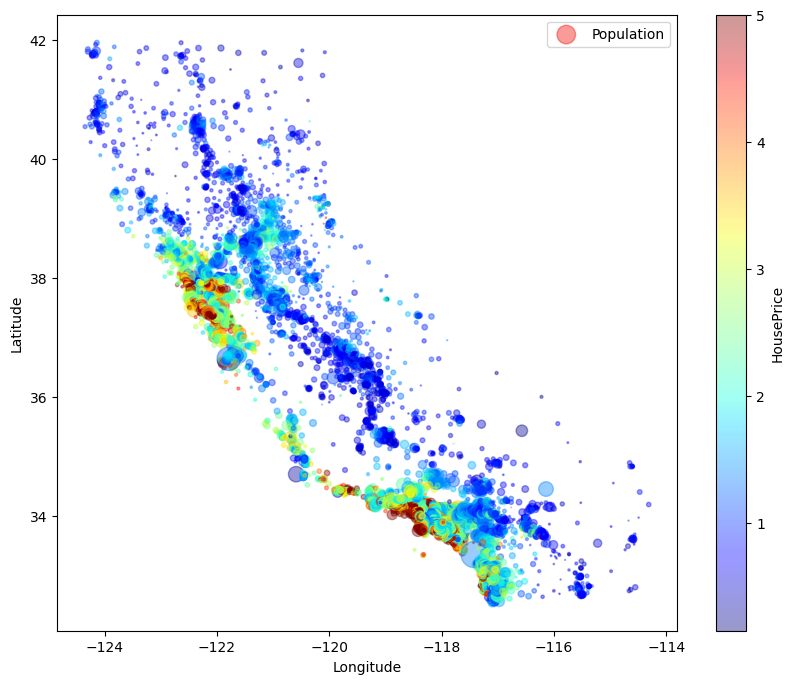

In [ ]:
df.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
    alpha=0.4,
    s=df['Population']/100,
    label='Population',
    c='HousePrice',
    cmap='jet',
    colorbar=True,
    figsize=(10,8)
)
plt.show()

<Axes: >

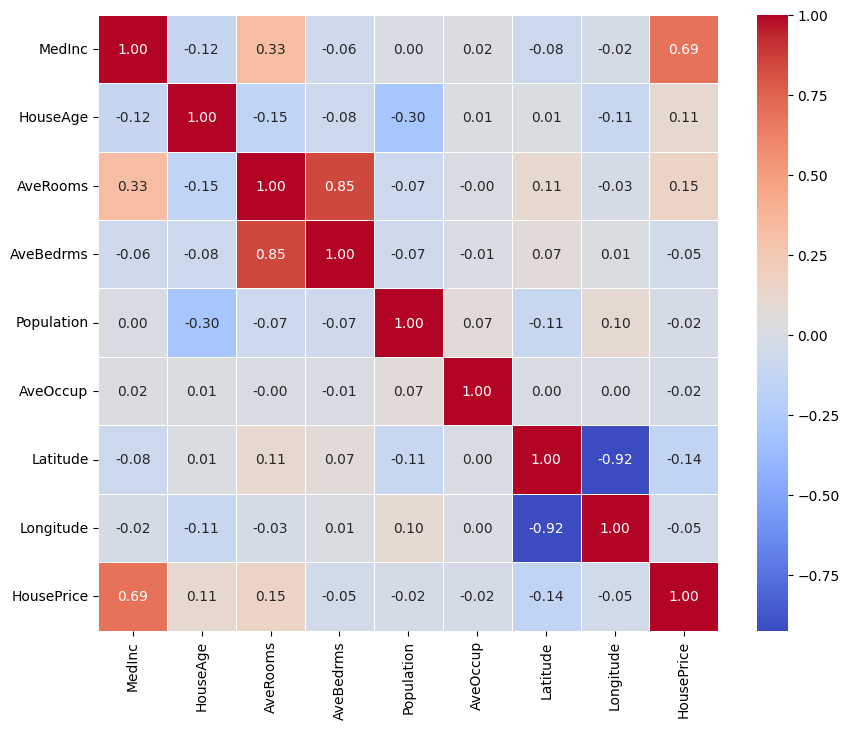

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)

In [ ]:
corr['HousePrice'].abs().sort_values(ascending=False)

,HousePrice
HousePrice,1.000000
MedInc,0.688075
AveRooms,0.151948
Latitude,0.144160
HouseAge,0.105623
AveBedrms,0.046701
Longitude,0.045967
Population,0.024650
AveOccup,0.023737


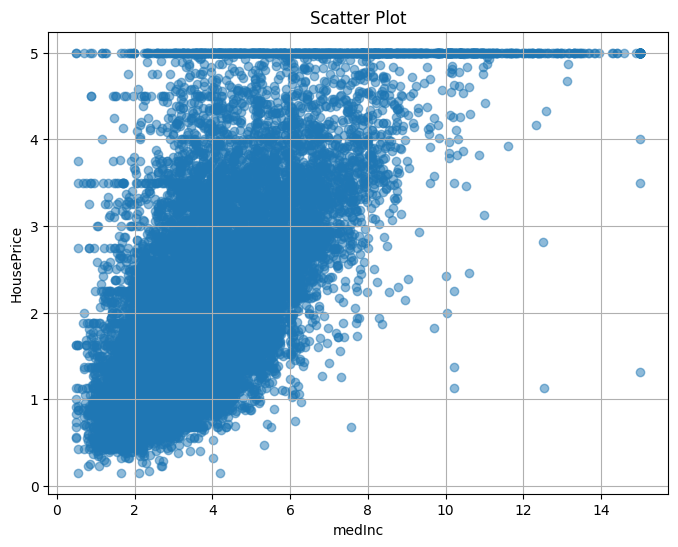

In [ ]:
medInc = df['MedInc']
houseprice = df['HousePrice']

plt.figure(figsize=(8,6))
plt.scatter(medInc, houseprice, alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('medInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df.drop('HousePrice', axis=1)
df_vif = df_vif.apply(pd.to_numeric, errors='coerce')

vif_data = pd.DataFrame()
vif_data['Feature'] = df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(df_vif, i) for i in range(len(df_vif.columns))]
vif_data


,Feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [ ]:
df = df.drop(['Longitude', 'Latitude'], axis=1)

In [ ]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df['HousePrice'] = df['HousePrice'].apply(pd.to_numeric, errors='coerce')

X = sm.add_constant(df.drop('HousePrice', axis=1))
y = df['HousePrice']

model = sm.OLS(y,X).fit()

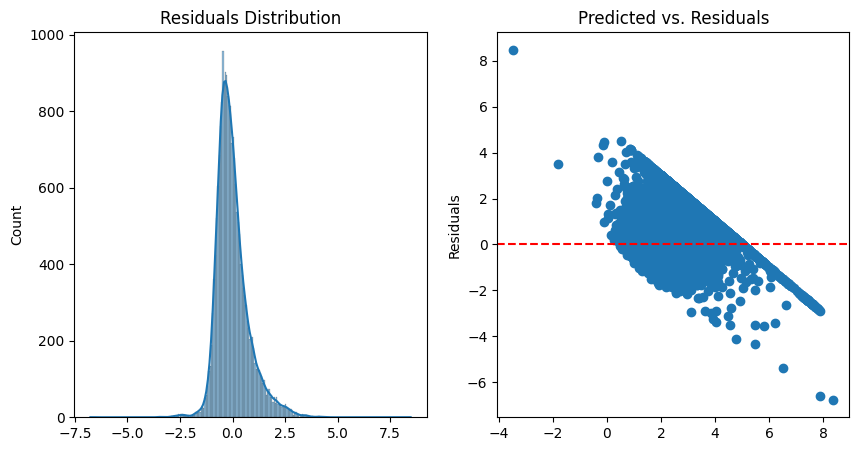

Model parameters: 
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [ ]:
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.show()

print('Model coefficients: \n', model.params)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

predictions = model.predict(X)

print("R2 score: ", r2_score(y, predictions))
print('MSE: ', mean_squared_error(y, predictions))

R2 score:  0.5396977345638283
MSE:  0.6129156196698703


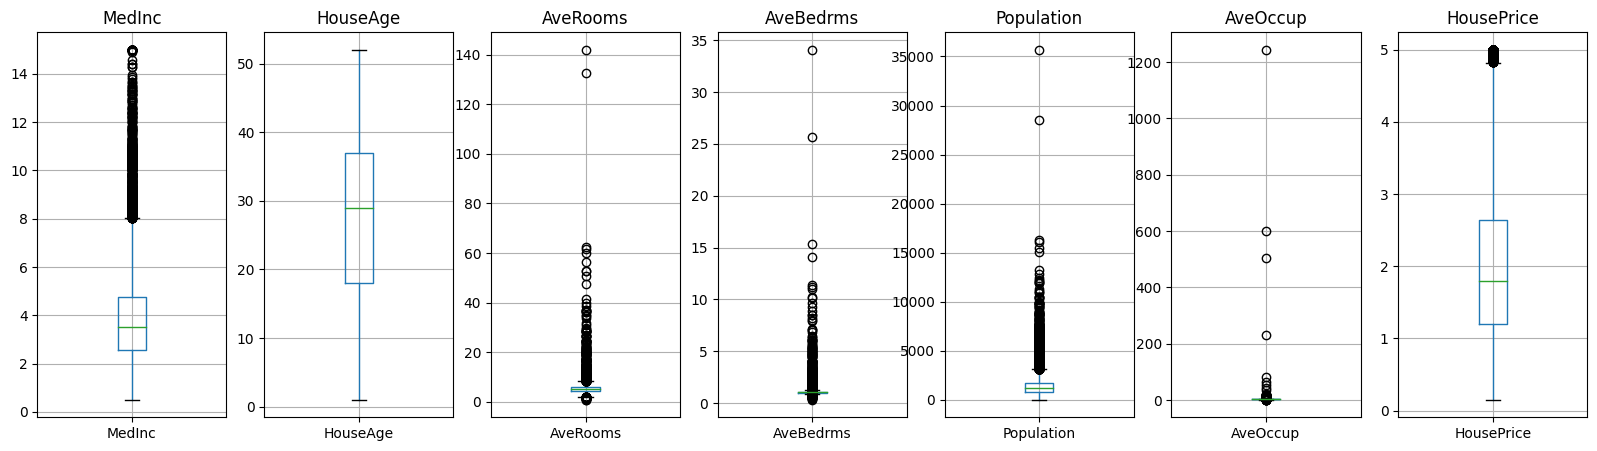

In [ ]:
def plot_boxplots(df):

  fig, axes = plt.subplots(1, len(df.columns), figsize=(20,5))

  for i, column_name in enumerate(df.columns):
      df.boxplot(column=column_name, ax=axes[i])
      axes[i].set_title(column_name)

  plt.show()

plot_boxplots(df)

In [ ]:
def remove_outliers(df):

  df_no_outliers = df.copy()

  for column_name in df.columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound
                                                                    else upper_bound if x > upper_bound else x)
  return df_no_outliers

df_new = remove_outliers(df)

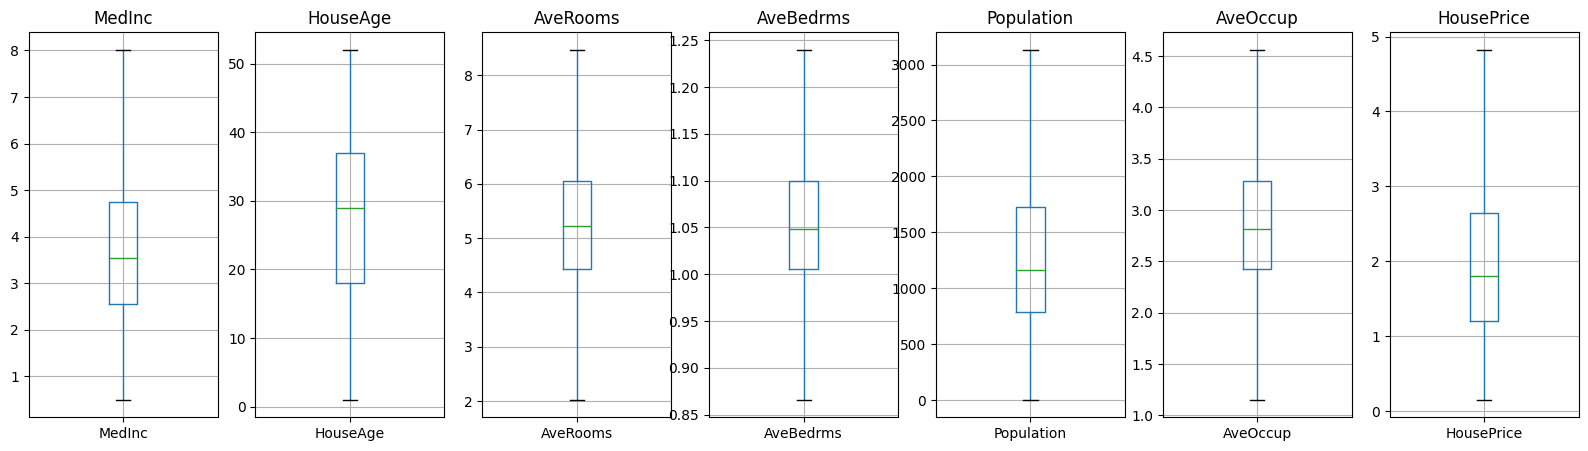

In [ ]:
plot_boxplots(df_new)

In [ ]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
df_new[cols_to_convert] = df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df_new['HousePrice'] = df_new['HousePrice'].apply(pd.to_numeric, errors='coerce')

X = sm.add_constant(df_new.drop('HousePrice', axis=1))
y = df_new['HousePrice']

model = sm.OLS(y,X).fit()

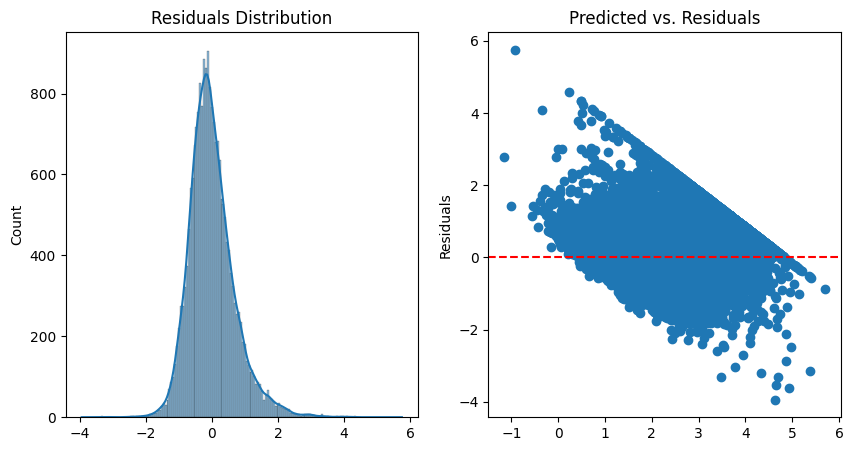

Model parameters: 
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


In [ ]:
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.show()

print('Model parameters: \n', model.params)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

predictions = model.predict(X)

print("R2 score: ", r2_score(y, predictions))
print('MSE: ', mean_squared_error(y, predictions))

R2 score:  0.617696810976802
MSE:  0.49001892235770017
